## Image Labeling via GCP Vision API
### By Lara Suzuki

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/lasuzuki"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [5]:
from __future__ import print_function
from google.cloud import vision
from IPython.display import Image
from google.cloud import storage

In [6]:
PROJECT_ID = "interplanetary-internet-326315"
GOOGLE_APPLICATION_CREDENTIALS = "interplanetary-internet-326315-d616505a7a1e.json"
BUCKET_NAME = "suzuki-ipn-vision"
REGION = "us-central1"
IMAGE_FILE = "myimage.jpg"

### Display the Image

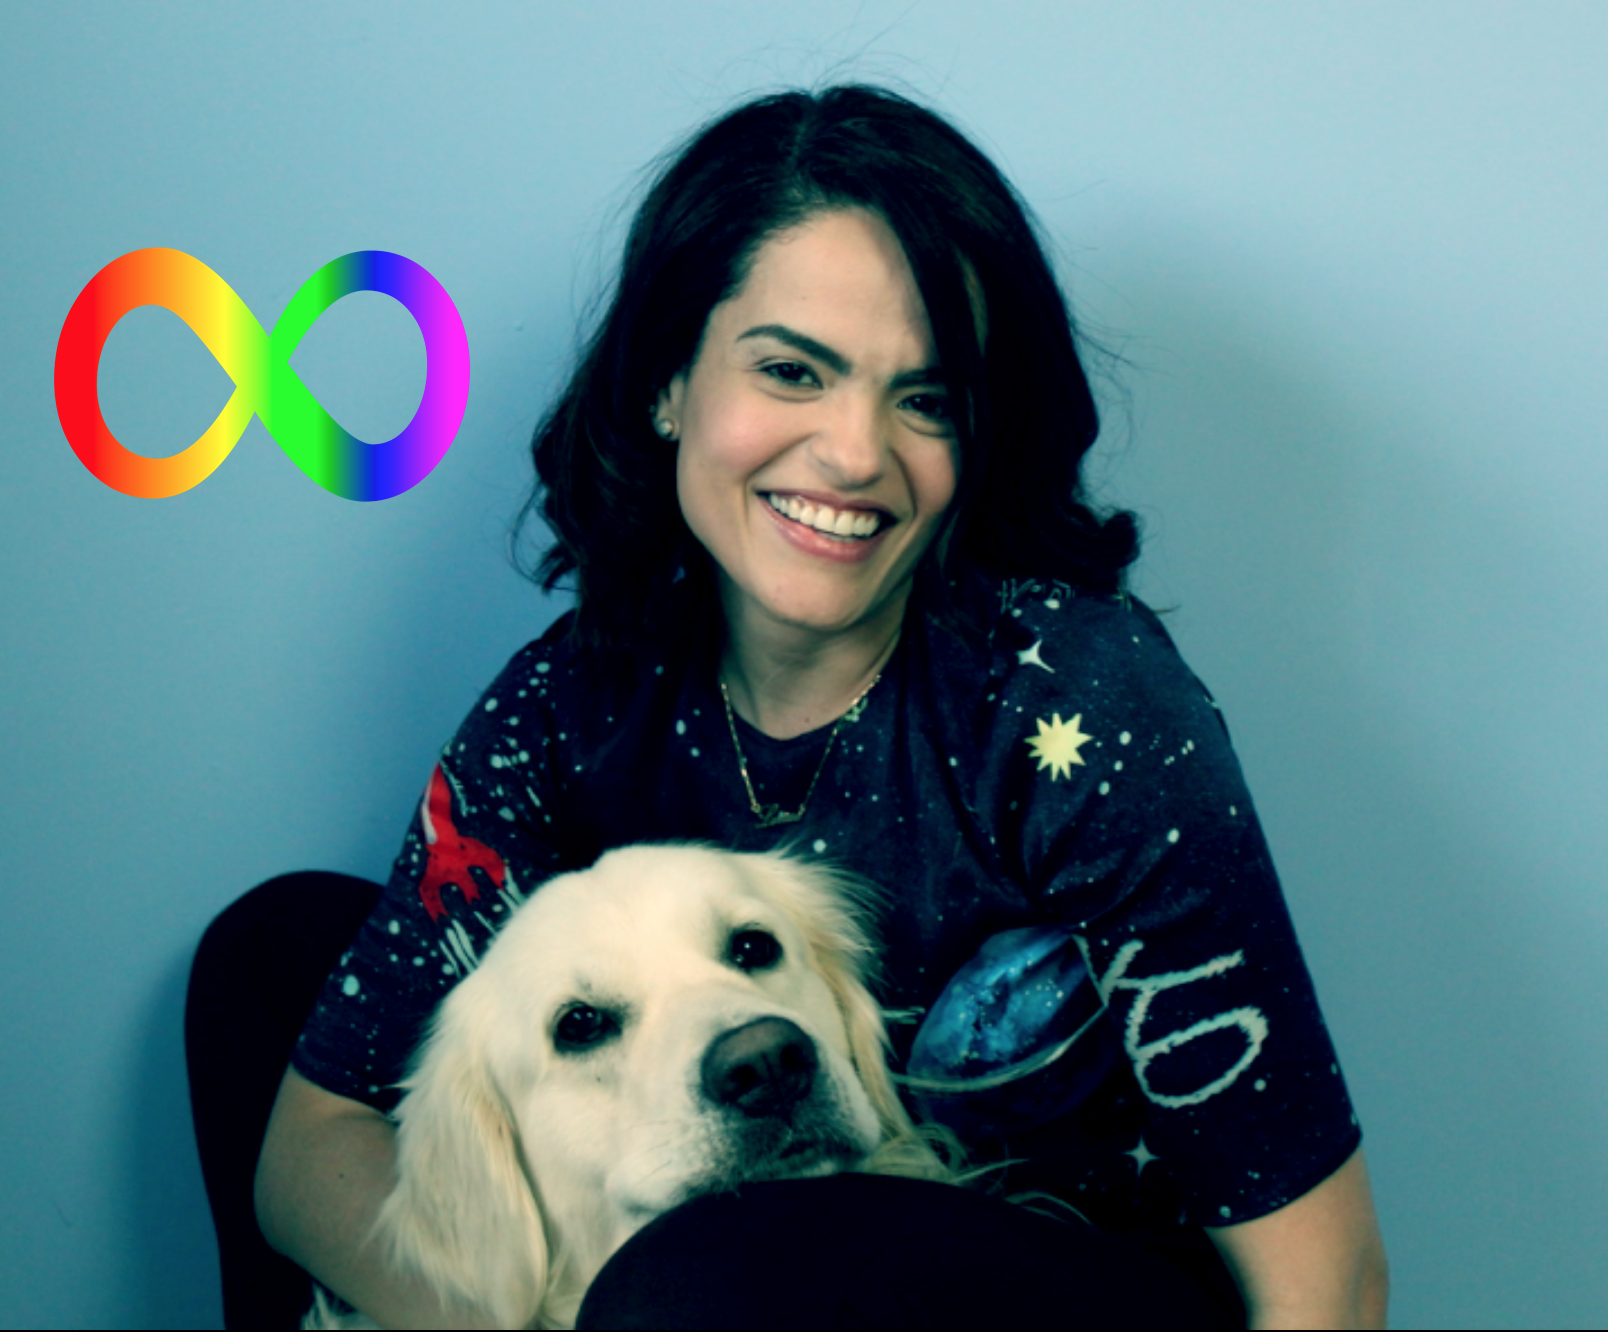

In [7]:
storage_client = storage.Client()
bucket = storage_client.bucket(BUCKET_NAME)
blob = bucket.blob(IMAGE_FILE)
blob.download_to_filename("myimage.jpg")
Image("myimage.jpg", width = 600, height = 300)

### Extract objects from the images

In [8]:
image_uri = 'gs://' + BUCKET_NAME + '/' + IMAGE_FILE

client = vision.ImageAnnotatorClient()
image = vision.Image()
image.source.image_uri = image_uri

response = client.label_detection(image=image)

### Show the results for label detection

In [9]:
print('Labels (and confidence score):')
print('=' * 30)
for label in response.label_annotations:
    print(label.description, '(%.2f%%)' % (label.score*100.))

Labels (and confidence score):
Smile (97.84%)
Dog (95.01%)
Facial expression (93.28%)
Couch (92.51%)
Comfort (87.72%)
Happy (86.48%)
Flash photography (86.21%)
Carnivore (82.16%)
Companion dog (81.87%)
Fawn (81.57%)
